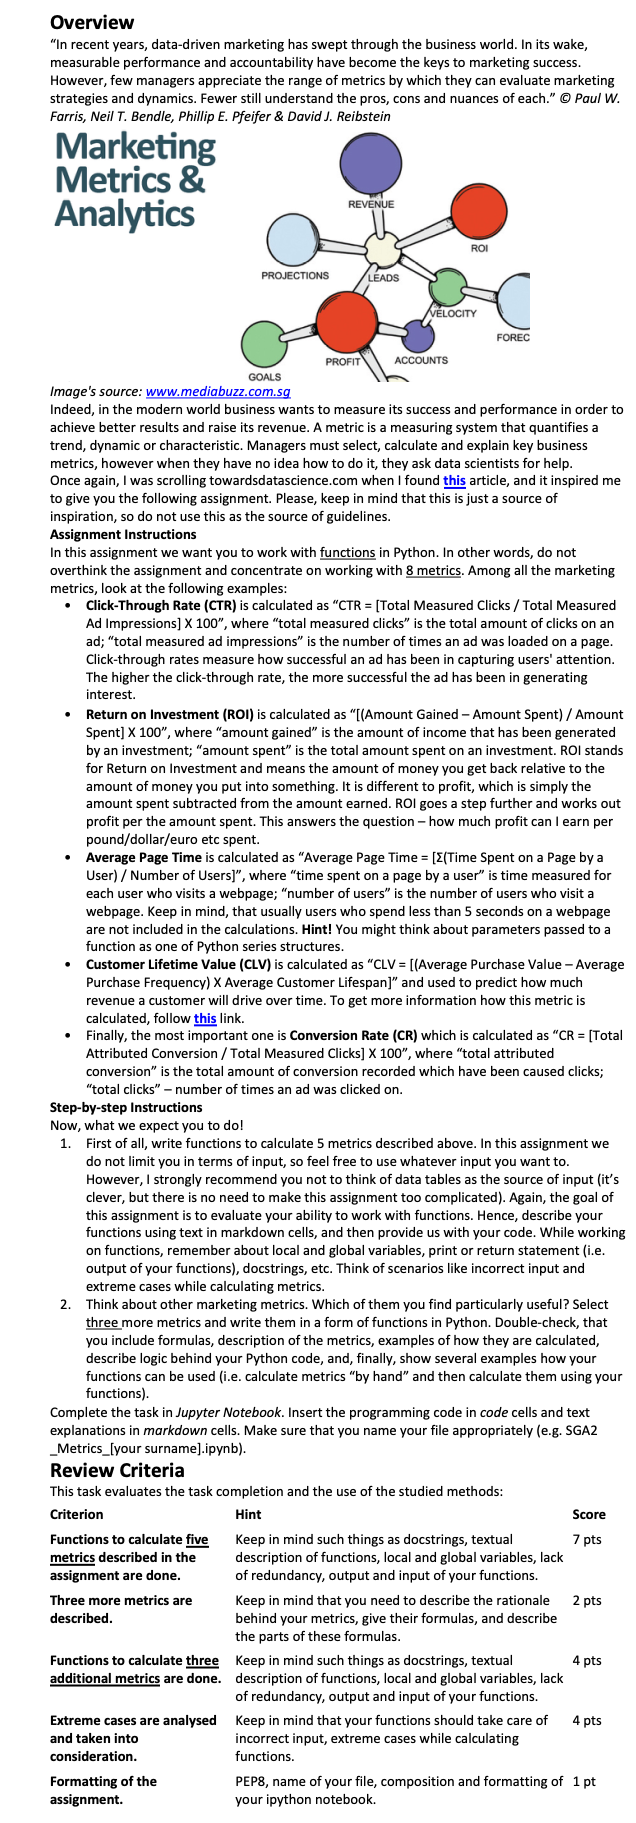

# Task 1 - CTR 
## Click-through rate - Ad Conversion

___the ratio of the number of clicks to the number of ad displays___

### Strategy

Ideally this kind of a data would be stored in a CSV (comma seperated) file, and each column would hold a value for feature. like

- Datetime: This data type would store the information of date and time. It would different for different events like:
    - A click on a add
    - Share on social media
    - entering and leaving a perticular page on the website.
    - and other
    
- Event: Many different columns would come under this category. Each event would be stored in an independ column. Also, each even would genrate its own kind of data, like:
    - Click: Boolean - clicked on not clicked.
    - Page Access: Boolean/Datetime/String/Object
        - Accessed or not Accessed.
        - Date and Time of access.
        - Date and time of leaving the page.
        - Previous link to the page.
        - Advance link to the page.
        - and other
    - Number of ads: Integer
        - Number of ads on each page.
        - Number of external ads.
        - Number of internal ads.
        - and others
    
- Personal Information: Many different columns would come under this category. Each information type would be stored in an independ column. Also, each even would genrate its own kind of data, like:
    - Gender: String/Categorical - Male/Female/Other.
    - Age: Integer/Categorical
        - 18 yrs.
        - 20 - 25 yrs.
    - User Id: String/Object - If the user has an account on the website.
    - IP address String/Object - If the user does not have a account, user may be identified through his/her IP address.
    
We may read this using `Pandas library`. Each column would be accessed as a `Numpy Array` for further analysis. Due to the **Review Criteria**[<sup>1</sup>](#fn1) we will be using the `list`, `set` and other studied `data structures` only

Also since the data storage, format, accessibility, etc are not given in the provided information. We will assume that the data is already cleaned, formated and stored in the lists/sets/dictionaries.

We would be assuming the following naming convention:
1. click_df = it will be list of lists, will store the total number of clicks each day. Each individual list will store the date-wise clicks for each page. 
    - `click_df[i]` will point to the **ith page**.
    - `click_df[i][j]` will point to the **jth date** of **ith page**
1. date_df = dates for which the sum of click is stored. (click_df and date_df would be matched based on the same index)[<sup>2</sup>](#fn2)
1. num_ads = number of ads on each page.
1. pages = it will store the name of the each page. (click_df, num_ads and pages would be matched based on the same index)[<sup>3</sup>](#fn3)

### Function - `calculate_ctr`
This function will calculate the Click through rate. It will use the information of date, number of clicks, number of ads, name of pages. A new list ctr_df will also be provided to store the final result.

In [1]:
from datetime import datetime, timedelta, date
import random

### PEP8 Check
Following functions were loaded to check for the pep8 recommendations.

%load_ext pycodestyle_magic

%pycodestyle_on

In [2]:
def calcuate_ctr(date_df, click_df, num_ads_df, pages_df, ctr_df):
    try:
        for page in pages_df:
            idx1 = pages_df.index(page)
            ads = num_ads_df[idx1]
            for date in date_df:
                dummy = []
                idx2 = date_df.index(date)
                dummy.append(date)
                dummy.append(page)
                dummy.append(click_df[idx1][idx2]*100/ads)
                ctr_df.append(dummy)
    except TypeError as TE:
        print('Enter the data in correct format (only Python List)')

### Function `print_ctr_page`
It will provide a print of the information for the desired page of the news website. Whole information stored will be displayed.

### Function `print_ctr_date`
It will provide a print of the information for the desired date of the news website. Information stored for each page will be displayed for that date. If no date is choosen then data for today (10 Oct 2020) will be displayed.

In [3]:
def print_ctr_page(ctr_df, page):
    if page in pages_df:
        idx = pages_df.index(page)
        print('CTR information for {}'.format(page))
        print('Date\t\t\t', 'CTR')
        for i in range(len(ctr_df)):
            if ctr_df[i][1] == page:
                print('{:%d, %b %Y}\t\t{:.02f}'.format(ctr_df[i][0],
                                                       ctr_df[i][2]))
    else:
        print('Check the name of the page category\nIt should be one of',
              'the following:\n politics\n sport\n science\n technologies')


def print_ctr_date(ctr_df, date_ctr=date(2020, 10, 10)):
    print('CTR information for {}'.format(date_ctr))
    print('page\t\t', 'CTR')
    for i in range(len(ctr_df)):
        if ctr_df[i][0] == date_ctr:
            print('{:<12}\t{:.02f}'.format(ctr_df[i][1], ctr_df[i][2]))

### Random Data
For the purpose of testing, I am genrating random data for **date**, **click**, and **ads**.

In [4]:
# creating sample date_df
date_df = list()
a = datetime.today()
numdays = 100
date_df = [a.date() - timedelta(days=x) for x in range(numdays)]


# creating sample click_df
click_df = [1, 2, 3, 4]
n = 0
while n < 4:
    click_df[n] = random.sample(range(1, 1000), 100)
    n += 1


# creating sample page_df
pages_df = ['politics', 'sport', 'science', 'technologies']


# creating num_ads
num_ads_df = list()
num_ads_df = [random.randint(1, 30) for x in range(4)]


# Creating empty ctr_df
ctr_df = []

In [5]:
calcuate_ctr(date_df, click_df, num_ads_df, pages_df, ctr_df)

In [6]:
print_ctr_date(ctr_df, date(2020, 8, 1))
print_ctr_page(ctr_df, 'sciences')

CTR information for 2020-08-01
page		 CTR
politics    	2783.33
sport       	9800.00
science     	3944.44
technologies	488.89
Check the name of the page category
It should be one of the following:
 politics
 sport
 science
 technologies


# Task 3 - ROI
## Retrun of Interest

___the percentage of the profit to the amount spent___

### Strategy

A function will call for the value of **amount spent -** `amt_spent`, **amount gained -** `amt_gain` and will return a float value of the calculated **Return of Investment**

### Function - `calculate_roi`
This function will calculate the Return of Investment. It will use the information of Investment, return on investment per page.

In [7]:
def calculate_roi():
    statement1 = ' 1. Enter the amount spent in any currency '
    statement2 = '(for example 58 Dollor and 38 cents = 50.38)'
    statement3 = '2. 3 or more decimal numbers will be round '
    statement4 = 'off to 2 decimal value (20.102 = 20.10)'
    print(statement1+statement2, '\n', statement3+statement4)
    n = True
    while n == True:
        try:
            amt_spent = float(input())
            n = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct amount spent.')

    print(statement1+statement2, '\n', statement3+statement4)
    m = True
    while m == True:
        try:
            amt_gain = float(input())
            m = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct amount gained.')    
    roi = round((amt_gain - amt_spent) * 100 / amt_spent, 2)
    return roi

In [8]:
calculate_roi()

 1. Enter the amount spent in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 200


 1. Enter the amount spent in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 20


-90.0

# Task 3 - APT
## Average Page Time

___the ratio of the number of clicks to the number of ad displays___

### Strategy

Ideally this kind of a data would be stored in a CSV (comma seperated) file, and each column would hold a value for feature. like

- Datetime: This data type would store the information of time spent on a page in seconds.
    
- Personal Information: Many different columns would come under this category. Each information type would be stored in an independ column. Also, each even would genrate its own kind of data, like:
    - Gender: String/Categorical - Male/Female/Other.
    - Age: Integer/Categorical
        - 18 yrs.
        - 20 - 25 yrs.
    - User Id: String/Object - If the user has an account on the website.
    - IP address String/Object - If the user does not have a account, user may be identified through his/her IP address.
    
We may read this using `Pandas library`. Each column would be accessed as a `Numpy Array` for further analysis. Due to the **Review Criteria**[<sup>1</sup>](#fn1) we will be using the `list`, `set` and other studied `data structures` only

Also since the data storage, format, accessibility, etc are not given in the provided information. We will assume that the data is already cleaned, formated and stored in the lists/sets/dictionaries.

We would be assuming the following naming convention:
1. visitor_df = it will be list of lists, will store the total number of visitors each day. Each individual list will store the page-wise users. 
    - `visitor_df[i]` will point to the **ith page**.
    - `visitor_df[i][j]` will point to the **j seconds spent** on **ith page**
1. exit_df = it will be list of lists, will store the total number of visitors leaving each day. Each individual list will store the page-wise users. 
    - `exit_df[i]` will point to the **ith page**.
    - `exit_df[i][j]` will point to the **j seconds spent** on **ith page**
1. time_df = time spent by each user on per page. (user_df and time_df would be matched based on the same index)[<sup>2</sup>](#fn2)
1. pages = it will store the name of the each page. (user_df, time_df and pages would be matched based on the same index)[<sup>3</sup>](#fn3)

### Function - `calculate_apt`
This function will calculate the Average Page Time. It will use the information of time spent, number of users, name of pages. A new list apt_df will also be provided to store the final result.

In [9]:
def convert_seconds(seconds):
    m = seconds % 3600 // 60
    s = seconds % 3600 % 60
    return '{:02d}m:{:02d}s'.format(m, s)


def calcuate_apt(time_df, user_df, pages_df, apt_df):
    try:
        for page in pages_df:
            idx1 = pages_df.index(page)
            users = sum(visitor_df[idx1]) - sum(exit_df[idx1])
            roi = round((sum(time_df[idx1]))*100/(users), 2)
            roi = convert_seconds(int(roi))
            apt_df.append(roi)
    except TypeError:
        print('Enter the data in correct format (only Python List)')

### Random Data
For the purpose of testing, I am genrating random data for **time**, **visitor**, **exits** and **page**.

In [10]:
# creating sample time_df
time_df = [1, 2, 3, 4]
n = 0
while n < 4:
    time_df[n] = random.sample(range(1, 1000), 100)
    n += 1


# creating sample visitor_df
visitor_df = [1, 2, 3, 4]
n = 0
while n < 4:
    visitor_df[n] = random.sample(range(500, 1000), 100)
    n += 1


# creating sample exit_df
exit_df = [1, 2, 3, 4]
n = 0
while n < 4:
    exit_df[n] = random.sample(range(1, 500), 100)
    n += 1


# creating sample page_df
pages_df = ['politics', 'sport', 'science', 'technologies']


# Creating empty atp_df
apt_df = []

In [11]:
apt = calcuate_apt(time_df, visitor_df, pages_df, apt_df)
print(apt_df)

['01m:45s', '01m:39s', '01m:47s', '01m:45s']


## Footnotes:

<span id="fn1"> 1. This task evaluates the task completion and the use of the studied methods.</span>

<span id="fn2"> 2. In Pandas we would have used datetime as a index to call for respective clicks.</span>

<span id="fn3"> 3. In Pandas we would have used seprate columns for each page and would have been able to store information of number of adds on each page on each date.</span>

# Task 3 - CLV
## Customer Lifetime Value

___used to predict how much revenue a customer will drive over time.___

### Strategy

To be able to calculate the **Customer Lifetime Value**, we will need to calculate four different parameter
1. Average Purchase Value = 
\begin{equation*}
\frac{\text{Total Revenue}}{\text{# of Purchase}}
\end{equation*}

1. Average Purchase Frequency = 
\begin{equation*}
\frac{\text{# of Purchase}}{\text{Unique Customer}}
\end{equation*}

1. Average Customer Lifespan = 
\begin{equation*}
\frac{\text{Customer Lifespans Total}}{\text{# of customers used in Equation}}
\end{equation*}

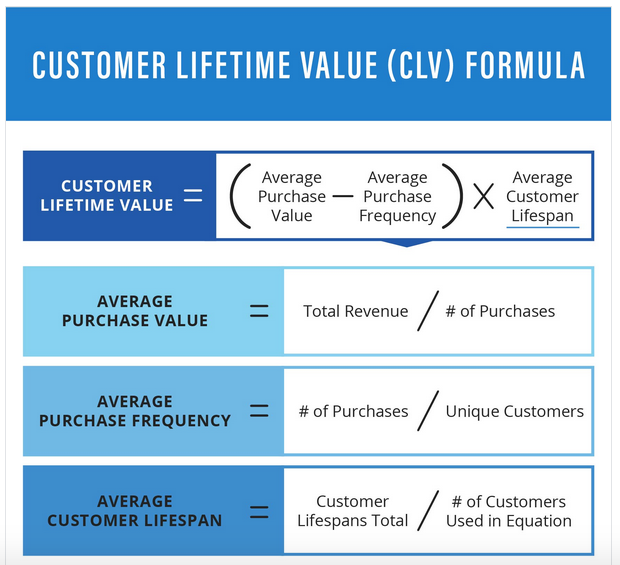

In [12]:
# To calculate the numbers Unique customers


def unique_cust(cust_list):
    try:
        uniqueCustomer = len(set(cust_list))
        return uniqueCustomer
    except TypeError as TE:
        print('Enter the list of customers')

# To calculate the total revenue


def total_revenue(sale_list):
    try:
        totalRevenue = sum(sale_list)
        return totalRevenue
    except TypeError as TE:
        print('Enter the sale list')

# To calculate the total number of purchases


def number_purchase(sale_list):
    try:
        numberofPurchase = len(sale_list)+1
        return numberofPurchase
    except TypeError as TE:
        print('Enter the sale list')

# To calculate the total customer life span


def total_cust_life(cust_ls):
    try:
        totalCustomerLifespan = sum(cust_ls)
        return totalCustomerLifespan
    except TypeError as TE:
        print('Enter the cust_ls')

# To calculate the average customer life span


def calculate_clv(cust_list, sale_list, cust_ls):
    averagePurchaceValue = total_revenue(sale_list)/number_purchase(sale_list)
    n_purchase = number_purchase(sale_list)
    averagePurchaceFrequency = n_purchase/unique_cust(cust_list)
    averageCustomerLifespan = total_cust_life(cust_ls)/unique_cust(cust_list)
    diff_purchase = averagePurchaceValue - averagePurchaceFrequency
    return diff_purchase * averageCustomerLifespan

In [13]:
cust_list = [1, 1, 1, 2, 3, 4, 5, 6, 1, 2, 5, 3, 2]
sale_list = [1000, 5028, 79037, 3732, 100, 89]
cust_ls = [3.2, 5, 1, 0.3, 0.5, 9]
calculate_clv(cust_list, sale_list, cust_ls)

40251.87698412698

# Task 3 - CR
## Conversion Rate

___the percentage of visitors to the website or landing page that convert.___

### Strategy

Conversion Rate
\begin{equation*}
\frac{\text{Total Attributed Conversion}}{\text{Total Measured Clicks}} \times 100
\end{equation*}

Total Attributed Conversion
\begin{equation*}
\text{Total clicks} \rightarrow \text{Number times an add was clicked on}
\end{equation*}


In [14]:
# Function to calculate the Total Attributed Conversion


def total_attribut_conv(total_click, add_clicks, page):
    try:
        return float(total_click - add_clicks)
    except TypeError:
        print('Enter the data in correct format (integers only)')

# Function to calculate the Conversion Rate


def conversion_rate(total_click, add_clicks, page):
    if page in pages_df:
        print('Conversion rate for {}'.format(page))
        try:
            return total_attribut_conv(total_click, add_clicks, page) * 100\
                / total_click
        except TypeError:
            print('Enter the data in correct format (integers only)')

    else:
        print('Page should be one of the following')
        print('science\n technologies\n', 'politics\n sport')

In [15]:
conversion_rate(12, 5, '')

Page should be one of the following
science
 technologies
 politics
 sport


# Other Marketing Metrics 
## Task 1 - RR 
### Retention Rate

___the ratio of the number of customers retained from who subscribed___

$$
 = \frac{\text{Number of people who remain subscribed}}{Total number of people who converted}
$$
### Strategy

Number of people that continued the subscription after a given period of time from the list of original suscribers. Normally we take 90 days of period to calculate the retention rate.

We would be assuming the following naming convention:
1. `[Month]_subscriber_df` = Monthwise subscriber list. For example: subscriber list for Month of apr -> Apr_subscriber_df

Then by calculating the intersection of subscriber lists of two different months, which are 90 days apart, we would be able to generate the list of retained subscribers

1. `retainedSubscribers` = Intersection of list of subscribers from two different months, which are 90 days apart.
\begin{equation*}
\text{retained subscribers} = \text{(suscriber list of month A)}~ \textbf{intersection}~ \text{(suscriber list of month B)}\\
\text{retained subscribers} = A \cap B
\end{equation*}

## Example
Subscriber list Jan, A = [1, 2, 3, 4, 5, 1, 1, 2, 6, 7, 2, 5]

Subscriber list Apr, B = [1, 2, 3, 4, 25, 1, 10, 22, 16, 7, 2, 15]

$$
A \cap B = {1, 2, 3, 4, 7}
$$

Hence,

$$
rr = \frac{n(A\cap B)}{n(A)} \\
rr = \frac{5}{7}
$$

In [16]:
def calcuate_rr(firstMonth_subscriber_list, thirdMonth_subscriber_list):
    try:
        firstMonth = set(firstMonth_subscriber_list)
        thirdMonth = set(thirdMonth_subscriber_list)
        retainedSubscribers = len(firstMonth.intersection(thirdMonth)) + 1
        return retainedSubscribers / (len(firstMonth) + 1)
    except TypeError as TE:
        print('Enter the data in correct format (only Python List)')

### Random Data
For the purpose of testing, I am genrating random data for **date**, **click**, and **ads**.

In [17]:
# creating sample subscriber list with subscriber id
Jan_subscribers_df = random.sample(range(1, 1000), 100)
Apr_subscribers_df = random.sample(range(1, 2000), 100)

In [18]:
calcuate_rr(Jan_subscribers_df, Apr_subscribers_df)

0.0594059405940594

# Task 2 - ROS
## Retrun on Sales

___the percentage of the profit to the sales revenue___

$$
 = \frac{\text{Net Profit (\$)}}{Sales Revenue (\$)} \\
 \text{Net Profit (\$)} = \text{amount gained} - \text{amount spent}
$$

### Strategy

A function will call for the value of **amount spent -** `amt_spent`, **amount gained -** `amt_gain`, **sales revenue -** `sales_revenue` and will return a float value of the calculated **Return on Sales**

$$
ros = \frac{\text{amount gained} - \text{amount spent}}{Sales Revenue}
$$

## Example
Amount Gained = $ 300

Amount spent = $ 200

Sales Revenue = $ 350

$$
ROS = \frac{300 - 200}{500} \\
ROS = \frac{100}{500} = \frac{1}{5} \\
ROS = 0.2
$$

### Function - `calculate_ros`
This function will calculate the Return on Sales. It will use the information of sales, return on sales per page.

In [22]:
def calculate_ros():
    statement1 = ' 1. Enter the amount spent in any currency '
    statement2 = '(for example 58 Dollor and 38 cents = 50.38)'
    statement3 = '2. 3 or more decimal numbers will be round off '
    statement4 = 'to 2 decimal value (20.102 = 20.10)'
    print(statement1+statement2, '\n', statement3+statement4)

    n = True
    while n == True:
        try:
            amt_spent = float(input())
            n = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct amount spent.')

    print(statement1+statement2,'\n',statement3+statement4)
    m = True
    while m == True:
        try:
            amt_gain = float(input())
            m = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct amount gained.') 
            
    print(' 1. Enter the sales revenue in any currency (for example 58 Dollor and 38 cents = 50.38)','\n',
          '2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)')
    m = True
    while m == True:
        try:
            sales_revenue = float(input())
            m = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct amount gained.')    
    try:
        roi = round((amt_gain - amt_spent) * 100 / sales_revenue, 2)
        return roi
    except ZeroDivisionError:
        print('Sales revenue can not be zero')

In [23]:
calculate_ros()

 1. Enter the amount spent in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 200


 1. Enter the amount spent in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 200


 1. Enter the sales revenue in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 0


Sales revenue can not be zero


# Task 3 - MERMI
## Media Exposure Return on Marketing Investment

___to evaluate the value of marketing activities such as sponsorships, marketers often commission research to gauge the number and quality of media exposures achieved ___

$$
 = \frac{\text{(Estimated value of media exposures achieved - Cost of marketing campaign, sponsorship or promotion)}}{\text{Cost of marketing campaign, sponsorship or promotion}}
$$


### Strategy

A function will call for the value of **estimated value of media exposure -** `value_media`, **Cost of marketing campain etc -** `cost_marketing` and will return a float value of the calculated **Media Exposure Return on Marketing Investment**

$$
MERMI = \frac{\text{estimate value of media exposure} - \text{cost of marketing compain etc}}{\text{media exposure return on marketing inverstment}}
$$

## Example
estimate value of media exposure = $ 300

cost of marketing compain etc = $ 200

media exposure return on marketing inverstment = $ 350

$$
MERMI = \frac{300 - 200}{500} \\
MERMI = \frac{100}{500} = \frac{1}{5} \\
MERMI = 0.2
$$

### Function - `calculate_mermi`
This function will calculate the Return of Investment. It will use the information of Investment, return on investment per page.

In [24]:
def calculate_mermi():
    statement1 = ' 1. Enter the amount spent in any currency '
    statement2 = '(for example 58 Dollor and 38 cents = 50.38)'
    statement3 = '2. 3 or more decimal numbers will be round off '
    statement4 = 'to 2 decimal value (20.102 = 20.10)'
    print(statement1+statement2, '\n', statement3+statement4)
    n = True
    while n == True:
        try:
            value_media = float(input())
            n = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct value_media.')

    print(statement1+statement2, '\n', statement3+statement4)
    m = True
    while m == True:
        try:
            cost_marketing = float(input())
            m = False
        except ValueError as ve:
            print('Entered value is not a number. Please enter the correct cost of marketing.')    
    try:
        roi = round((value_media - cost_marketing) * 100 / cost_marketing, 2)
        return roi
    except ZeroDivisionError:
        print('Marketing Cost can not be zero')

In [26]:
calculate_mermi()

 1. Enter the amount spent in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 20


 1. Enter the amount spent in any currency (for example 58 Dollor and 38 cents = 50.38) 
 2. 3 or more decimal numbers will be round off to 2 decimal value (20.102 = 20.10)


 0


Marketing Cost can not be zero
